In [324]:
# Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sns
import matplotlib

In [97]:
# Name of the CSV file
csv_path = 'googleplaystore.csv'

In [169]:
# The read the CSV file in pandas
googlestore = pd.read_csv(csv_path)
googlestore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [170]:
# Delete column "Current Ver" , "Android Ver" and "Genres"
del googlestore["Current Ver"]
del googlestore["Android Ver"] 
del googlestore["Genres"] 
googlestore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,7-Jan-18
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,15-Jan-18
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,1-Aug-18
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,8-Jun-18
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,20-Jun-18


In [100]:
# Identify incomplete rows
googlestore.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Last Updated      10841
dtype: int64

In [171]:
# Drop all rows with missing information
googlestore = googlestore.dropna(how='any')

In [102]:
# Verify dropped rows
googlestore.count()

App               9366
Category          9366
Rating            9366
Reviews           9366
Size              9366
Installs          9366
Type              9366
Price             9366
Content Rating    9366
Last Updated      9366
dtype: int64

In [103]:
# The "Reviews" and "Price" column are the wrong data types. They should be numeric.
googlestore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Last Updated       object
dtype: object

In [172]:
# Convert the datatype of 'Reviews' column
googlestore['Reviews'] = pd.to_numeric(googlestore['Reviews'])
# Remove dollar sign and convert the datatype of 'Price' column
googlestore['Price'] = googlestore['Price'].str.replace('$', '')
googlestore['Price'] = pd.to_numeric(googlestore['Price'])

In [105]:
# Verify datatypes have been changed
googlestore.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Last Updated       object
dtype: object

In [106]:
# Push the cleaned dataset to a new CSV file
googlestore.to_csv("googlestore_clean.csv",
                  encoding="utf-8", index=False, header=True)

PermissionError: [Errno 13] Permission denied: 'googlestore_clean.csv'

In [107]:
googlestore['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [108]:
googlestore['Size'].value_counts()

Varies with device    1637
14M                    166
12M                    161
11M                    160
15M                    159
                      ... 
551k                     1
994k                     1
33k                      1
526k                     1
241k                     1
Name: Size, Length: 414, dtype: int64

In [110]:
googlestore['Type'].value_counts()

Free    8719
Paid     647
Name: Type, dtype: int64

In [112]:
googlestore['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [113]:
googlestore['Last Updated'].value_counts()

3-Aug-18     319
2-Aug-18     284
31-Jul-18    279
1-Aug-18     275
30-Jul-18    199
            ... 
12-Feb-15      1
10-Jun-15      1
2-Aug-14       1
29-Apr-16      1
27-Aug-14      1
Name: Last Updated, Length: 1300, dtype: int64

In [114]:
# Display a statistical overview
googlestore.describe()

,Rating,Reviews,Price
count,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,0.960928
std,0.515219,3.144042e+06,15.816585
min,1.000000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,0.000000
50%,4.300000,5.930500e+03,0.000000
75%,4.500000,8.153275e+04,0.000000
max,5.000000,7.815831e+07,400.000000


# Which categories have the highest number of available apps?

In [187]:
# Display an overview of the Category column
googlestore['Category'].value_counts()

FAMILY                 1747
GAME                   1097
TOOLS                   734
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
PERSONALIZATION         314
LIFESTYLE               314
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [278]:
print(f"The Google Play Store have {googlestore['Category'].nunique()} categories")

print("The Google Play Store categories are:", googlestore['Category'].unique())

The Google Play Store have 33 categories
The Google Play Store categories are: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [279]:
print(f" In Google Play Store,  the category has the highest number of available apps is {googlestore['Category'].value_counts().index[0]}.")

 In Google Play Store,  the category has the highest number of available apps is FAMILY.


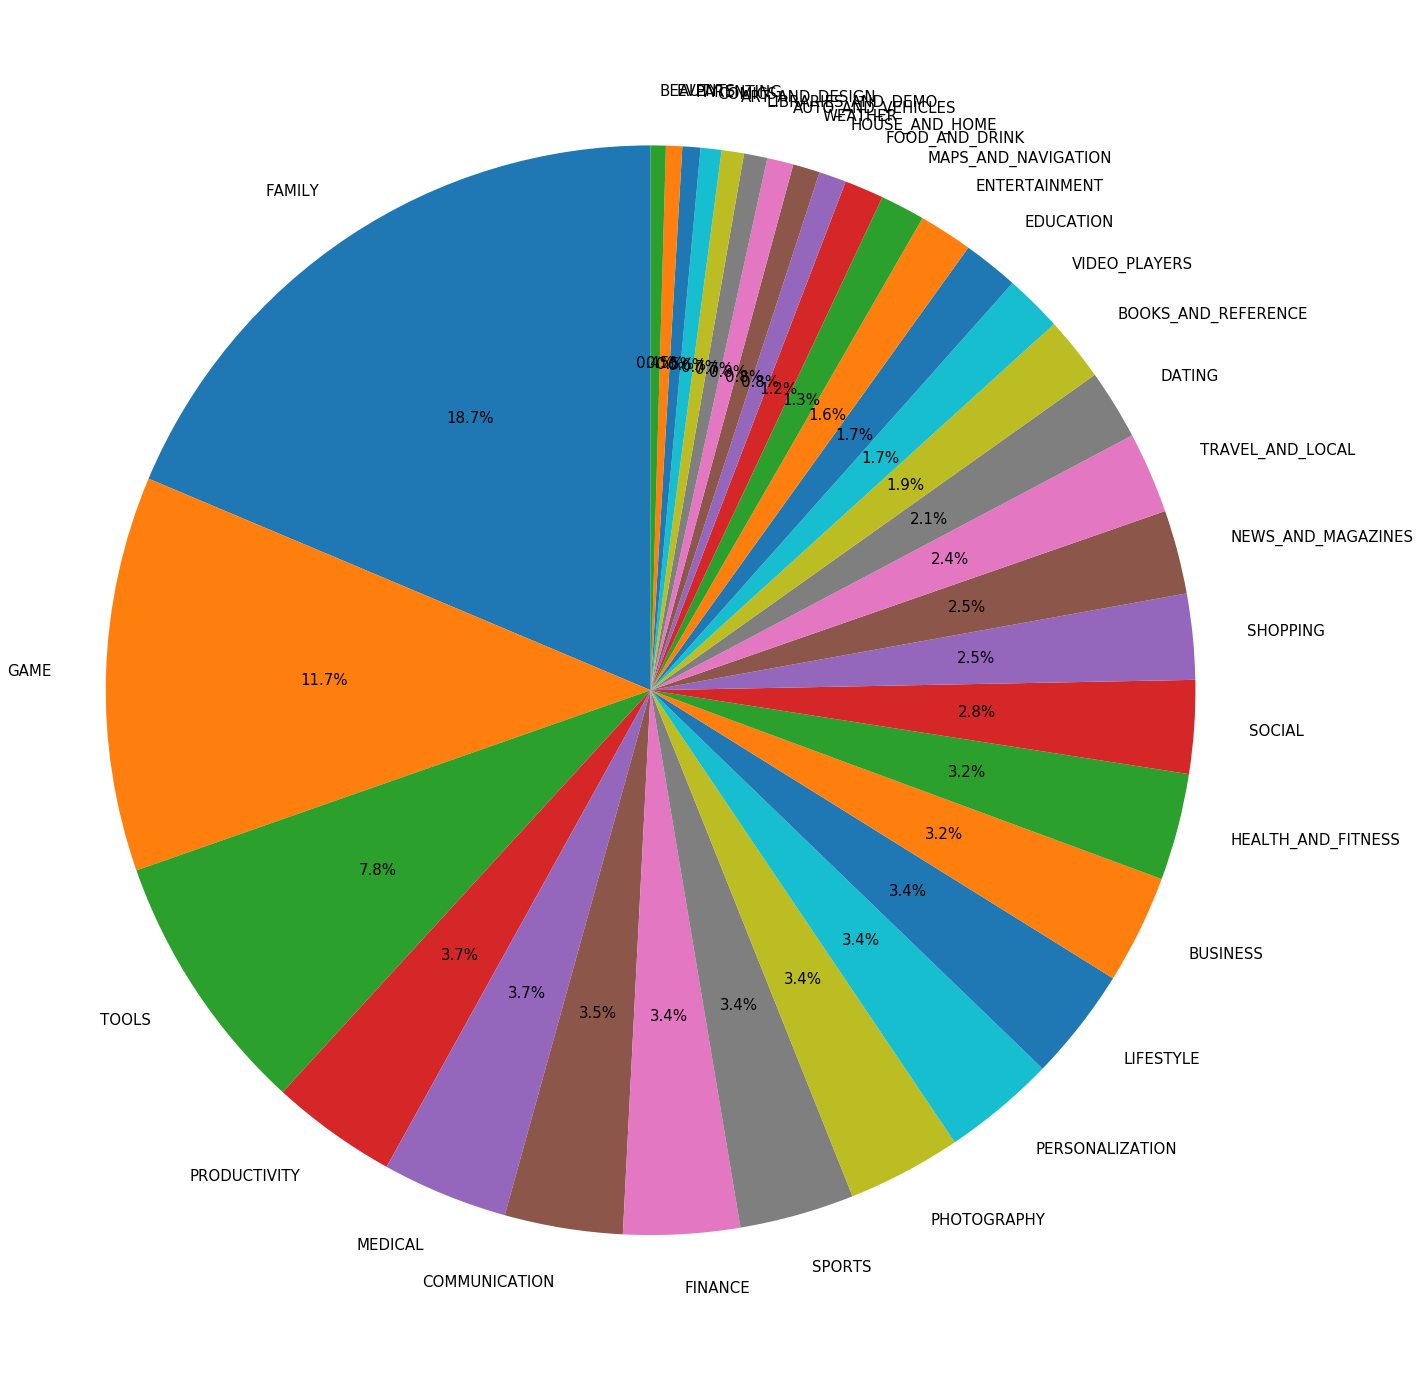

In [347]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = googlestore['Category'].value_counts().index
sizes = googlestore['Category'].value_counts()

matplotlib.rcParams['font.size'] = 15

fig1, ax1 = plt.subplots(figsize=(20, 20))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

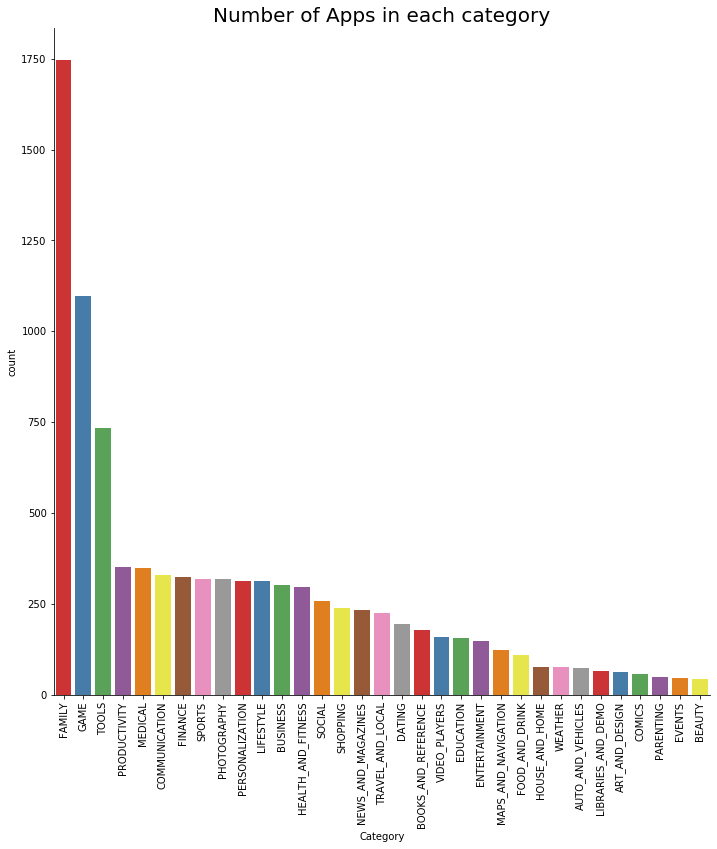

In [275]:
def plotchart(tab): 
    plot = sns.catplot(x=tab,y=compare, data=googlestore, kind=formats, height = 10,
    palette = "Set1", order= orders)
    plot.set_xticklabels(rotation=90, ha="center")
    plot = boxplot.set_ylabels(tab)
    plt.title(title,size = 20)
    plt.savefig(f"{title}.jpg")

tab = "Category"
compare = None
title = 'Number of Apps in each category'
orders= googlestore["Category"].value_counts().index
formats = "count"

plotchart(tab)

In [186]:
googlestore['Installs'].value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

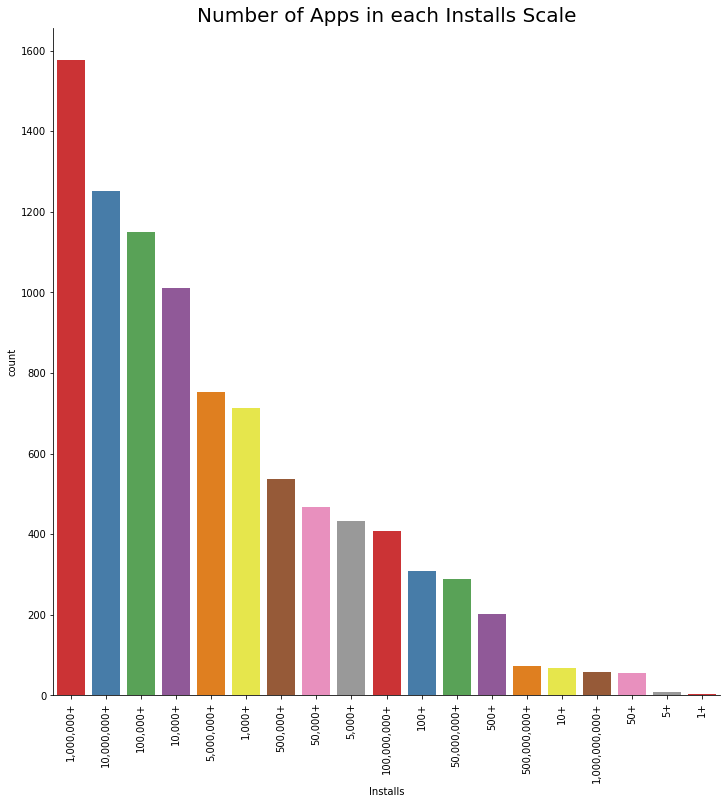

In [175]:
tab = "Installs"
compare = None
title = 'Number of Apps in each Installs Scale'
orders= googlestore["Installs"].value_counts().index
formats = "count"

plotchart(tab)

In [176]:
# Remove + sign and convert the datatype of 'Installs' column
googlestore['Installs'] = googlestore['Installs'].str.replace(",","")
googlestore['Installs'] = googlestore['Installs'].apply(lambda x: x.strip("+"))
googlestore['Installs'] = pd.to_numeric(googlestore['Installs'])

googlestore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,7-Jan-18
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,15-Jan-18
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,1-Aug-18
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,8-Jun-18
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,20-Jun-18


In [238]:
# Which categories have the highest number of installs?
group= googlestore.groupby(googlestore['Category'])
sum_installs = group["Installs"].sum()
sort_installs = sum_installs.sort_values(ascending=False)
sort_installs

Category
GAME                   35085862717
COMMUNICATION          32647241530
PRODUCTIVITY           14176070180
SOCIAL                 14069841475
TOOLS                  11450724500
FAMILY                 10257701590
PHOTOGRAPHY            10088243130
NEWS_AND_MAGAZINES      7496210650
TRAVEL_AND_LOCAL        6868859300
VIDEO_PLAYERS           6221897200
SHOPPING                3247831540
ENTERTAINMENT           2869160000
PERSONALIZATION         2325352930
BOOKS_AND_REFERENCE     1921291655
SPORTS                  1751131465
HEALTH_AND_FITNESS      1583056220
BUSINESS                1001768120
FINANCE                  876612400
EDUCATION                871352000
MAPS_AND_NAVIGATION      724267560
LIFESTYLE                537561120
WEATHER                  426096500
FOOD_AND_DRINK           273777750
DATING                   264295110
HOUSE_AND_HOME           168582000
ART_AND_DESIGN           124233100
LIBRARIES_AND_DEMO        62083000
COMICS                    56036100
MEDICAL    

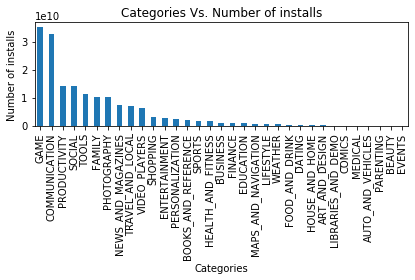

In [260]:
installs_plot = sort_installs.plot(kind="bar")

installs_plot.set_xticklabels(sort_installs.index, rotation = 90,ha="center")
# Configure plot and ticks

plt.title("Categories Vs. Number of installs")
plt.xlabel("Categories")
plt.ylabel("Number of installs")
# Set textual properties

plt.tight_layout()# Show plot
plt.savefig("Categories Vs. Number of installs.jpg")


In [259]:
print(f" In Google Play Store,  the category has the highest number of installs is {sort_installs.index[0]}.")

 In Google Play Store,  the category has the highest number of installs is GAME.


In [233]:
# What is the average price per category? (discounting free apps)
average_price = group["Price"].mean()
sort_price = average_price.sort_values(ascending=False)
sort_price

Category
FINANCE                7.553777
LIFESTYLE              6.244841
MEDICAL                2.980400
FAMILY                 1.314677
PERSONALIZATION        0.406879
WEATHER                0.392400
SPORTS                 0.292194
TOOLS                  0.283243
PHOTOGRAPHY            0.278360
GAME                   0.255570
BUSINESS               0.245512
MAPS_AND_NAVIGATION    0.217339
PRODUCTIVITY           0.202051
PARENTING              0.191600
COMMUNICATION          0.172835
TRAVEL_AND_LOCAL       0.165885
HEALTH_AND_FITNESS     0.152795
BOOKS_AND_REFERENCE    0.134157
DATING                 0.117744
EDUCATION              0.115871
ART_AND_DESIGN         0.096290
FOOD_AND_DRINK         0.077798
VIDEO_PLAYERS          0.065375
ENTERTAINMENT          0.053557
AUTO_AND_VEHICLES      0.027260
SHOPPING               0.023025
NEWS_AND_MAGAZINES     0.017082
SOCIAL                 0.007645
EVENTS                 0.000000
LIBRARIES_AND_DEMO     0.000000
COMICS                 0.000000